In [1]:
# Jupyter Notebook trial

In [1]:
# import libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
# load in dataset and breif summary of the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nickkas/python_ml_ect_/master/hmda.txt',delimiter='\t')

df.info()

df.isna().sum()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seq      2380 non-null   int64  
 1   s3       2380 non-null   int64  
 2   s4       2380 non-null   int64  
 3   s5       2380 non-null   int64  
 4   s6       2380 non-null   int64  
 5   s7       2380 non-null   int64  
 6   s9       2380 non-null   int64  
 7   s11      2380 non-null   int64  
 8   s13      2380 non-null   int64  
 9   s14      2379 non-null   float64
 10  s15      2380 non-null   int64  
 11  s16      2379 non-null   float64
 12  s17      2380 non-null   float64
 13  s18      2265 non-null   float64
 14  s19a     193 non-null    object 
 15  s19b     246 non-null    float64
 16  s19c     86 non-null     float64
 17  s19d     13 non-null     float64
 18  s20      2380 non-null   float64
 19  s23a     2378 non-null   object 
 20  s24a     2380 non-null   int64  
 21  s25a     2380 

seq        0
s3         0
s4         0
s5         0
s6         0
          ..
vr         0
school     0
chval      0
dnotown    0
dprop      0
Length: 62, dtype: int64

In [4]:
#Changing the names of the variables based on the HMDA Act 2007; only changing the ones that are relevant

df.rename(columns={'s5':'occupancy','s7':'approve','s11':'county','s13':'race',
                   's15':'sex','s17':'income','s23a':'married','s27a':'self_employed',
                   's33':'purchase_price','s34':'other_financing','s35':'liquid_assets',
                   's40':'credit_history','s42':'chmp','s43':'chcp','s44':'chpr',
                   's45':'debt_to_expense','s46':'di_ratio','s50':'appraisal',
                   's53':'pmi_denied','netw':'net_worth','uria':'unemployment',
                   'school':'education','s56':'unverifiable',
                   's52':'pmi_sought'},inplace=True)

In [5]:
# making it so the features acurately reflect the data
df['approve'] = [1 if X == 3 else 0 for X in df['approve']]
df['race'] = [0 if X == 3 else 1 for X in df['race']]
df['married'] = [1 if X == 'M' else 0 for X in df['married']]
df['sex'] = [1 if X == 1 else 0 for X in df['sex']]
df['credit_history'] = [1 if X == 1 else 0 for X in df['credit_history']]

features = ['occupancy','race','sex','income','married','credit_history','di_ratio',
            'pmi_denied','unverifiable','pmi_sought']

In [6]:
# The Dependent Varibale is 'Approved', the whole data set is not used because many of the features are not relevant
X = df[features]
y = df.approve

y.value_counts(normalize=True)

0    0.880252
1    0.119748
Name: approve, dtype: float64

In [7]:
# Importing Statsmodels for the sole purpose of seeing which features are statistically significant
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                approve   R-squared (uncentered):                   0.519
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              255.3
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:02:09   Log-Likelihood:                          18.586
No. Observations:                2380   AIC:                                     -17.17
Df Residuals:                    2370   BIC:                                      40.58
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [8]:
#Train/test split and preprocessing. For some reason, polynomialfeatures is the best with this data with a power of 1.

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
poly_X = poly.fit_transform(X)


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)

pred = clf.predict(X_test)


accuracy= 0.8949579831932774
roc= 0.8184895833333333
91.29925051291713


Text(0.5, 0, 'False Positive Rate')

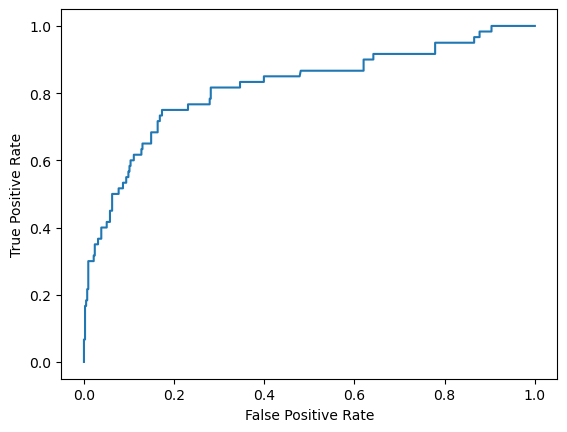

In [9]:
# The rest of the code is for the purpose of testing the cut-off for wether or not a indiviudal in Suffolk County was 
# apporved or denied a loan and independent variables that result in the highest roc_auc score, indicate the the cut-off and
# the over all performance of the model
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve

print('accuracy=',accuracy_score(y_test, pred))


y_pred = clf.predict_proba(X_test)[::,1]


print('roc=',roc_auc_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score

cv_roc = cross_val_score(clf, poly_X,y,cv=5,scoring='roc_auc').max()
print(cv_roc*100)

fpr, tpr, _ = roc_curve(y_test, y_pred)



plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')